In [2]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [35]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [36]:
#df.info()

In [37]:
testing = df[["koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth", 
                        "koi_prad", "koi_teq", "koi_insol", "koi_model_snr", "koi_tce_plnt_num",
                        "koi_steff", "koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"]]
testing.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


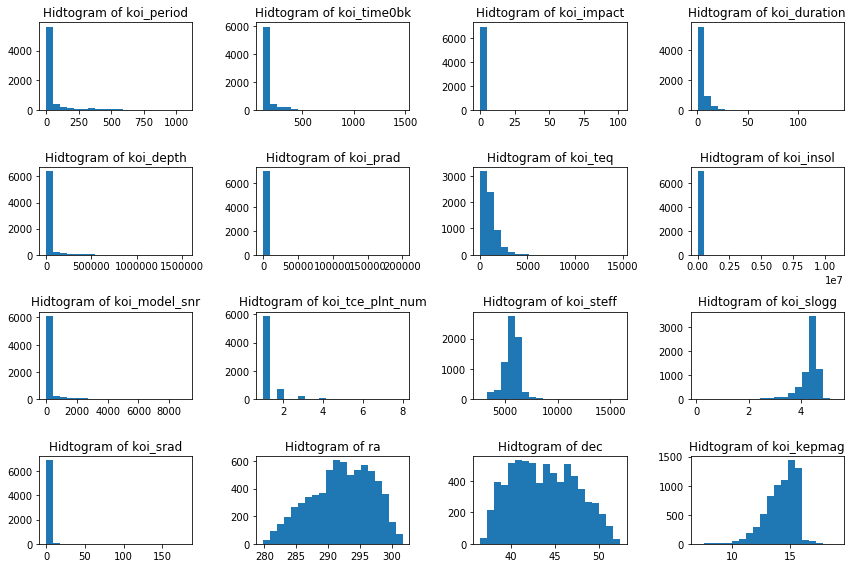

In [38]:
# Plot oneway graphs field versus target
j = 0 #select the starting field for plots
fig = plt.figure(figsize=(12,8))

for i in range(16):
    field1 = testing.columns[j]
    plt.subplot(4,4,i+1)
    try:
        plt.hist(testing[field1], bins=20)
    except:
        plt.scatter(0,0)
    plt.title("Hidtogram of " + field1)
    j=j+1

plt.tight_layout()
plt.savefig("Images/testing_features.png")
plt.show()

# Select your features (columns)

In [82]:
# Set features. This will also be used as your x values.
selected_features = df[["koi_teq", "koi_steff", "koi_slogg", "ra", "dec", "koi_kepmag"]]
print(selected_features.head())
X = np.array(selected_features)
X[:5]

   koi_teq  koi_steff  koi_slogg         ra        dec  koi_kepmag
0      443       5455      4.467  291.93423  48.141651      15.347
1      638       5853      4.544  297.00482  48.134129      15.436
2     1395       5805      4.564  285.53461  48.285210      15.597
3     1406       6031      4.438  288.75488  48.226200      15.509
4     1160       6046      4.486  296.28613  48.224670      15.714


array([[4.4300000e+02, 5.4550000e+03, 4.4670000e+00, 2.9193423e+02,
        4.8141651e+01, 1.5347000e+01],
       [6.3800000e+02, 5.8530000e+03, 4.5440000e+00, 2.9700482e+02,
        4.8134129e+01, 1.5436000e+01],
       [1.3950000e+03, 5.8050000e+03, 4.5640000e+00, 2.8553461e+02,
        4.8285210e+01, 1.5597000e+01],
       [1.4060000e+03, 6.0310000e+03, 4.4380000e+00, 2.8875488e+02,
        4.8226200e+01, 1.5509000e+01],
       [1.1600000e+03, 6.0460000e+03, 4.4860000e+00, 2.9628613e+02,
        4.8224670e+01, 1.5714000e+01]])

In [83]:
y = df["koi_disposition"]
print(y.head())
y.shape

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object


(6991,)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
print(encoded_y[:5])
from keras.utils import to_categorical
one_hot_y = to_categorical(encoded_y)
one_hot_y[:5]

[1 2 2 1 1]


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state=1)

In [86]:
X_train[:5]

array([[8.9900000e+02, 6.0470000e+03, 4.3870000e+00, 2.9809543e+02,
        4.4737061e+01, 1.3204000e+01],
       [4.9100000e+02, 4.8520000e+03, 4.5190000e+00, 2.9573535e+02,
        4.2576248e+01, 1.5514000e+01],
       [1.2760000e+03, 4.6640000e+03, 4.5940000e+00, 2.9218417e+02,
        4.9310040e+01, 1.5414000e+01],
       [3.0000000e+02, 5.6460000e+03, 4.4470000e+00, 2.8311377e+02,
        4.8131390e+01, 1.3328000e+01],
       [5.6800000e+02, 6.7050000e+03, 4.1450000e+00, 2.9493198e+02,
        3.9812420e+01, 1.2964000e+01]])

In [87]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler().fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)
X_train_scaled[:5]

array([[0.05536878, 0.38937443, 0.81624976, 0.83497297, 0.51779124,
        0.5155798 ],
       [0.02737564, 0.25195492, 0.84107579, 0.72693168, 0.38067188,
        0.70650467],
       [0.08123499, 0.23033579, 0.85518149, 0.56436342, 0.80798012,
        0.69823952],
       [0.01427101, 0.34326127, 0.82753432, 0.14913268, 0.73318618,
        0.52582858],
       [0.03265866, 0.4650414 , 0.77073538, 0.69015448, 0.20528683,
        0.49574345]])

# Train the Model



In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=21, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=21, activation='relu'))
#model.add(Dense(units=7, activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 21)                147       
_________________________________________________________________
dense_25 (Dense)             (None, 21)                462       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 66        
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
model.fit(X_train_scaled, y_train, epochs=20, shuffle=True, verbose=2)

Train on 5243 samples
Epoch 1/20
5243/5243 - 1s - loss: 1.0423 - accuracy: 0.4875
Epoch 2/20
5243/5243 - 0s - loss: 1.0192 - accuracy: 0.4984
Epoch 3/20
5243/5243 - 0s - loss: 1.0028 - accuracy: 0.5045
Epoch 4/20
5243/5243 - 0s - loss: 0.9897 - accuracy: 0.5073
Epoch 5/20
5243/5243 - 0s - loss: 0.9827 - accuracy: 0.5070
Epoch 6/20
5243/5243 - 0s - loss: 0.9788 - accuracy: 0.5085
Epoch 7/20
5243/5243 - 0s - loss: 0.9756 - accuracy: 0.5047
Epoch 8/20
5243/5243 - 0s - loss: 0.9733 - accuracy: 0.5052
Epoch 9/20
5243/5243 - 0s - loss: 0.9711 - accuracy: 0.5041
Epoch 10/20
5243/5243 - 0s - loss: 0.9703 - accuracy: 0.5070
Epoch 11/20
5243/5243 - 0s - loss: 0.9691 - accuracy: 0.5068
Epoch 12/20
5243/5243 - 0s - loss: 0.9683 - accuracy: 0.5089
Epoch 13/20
5243/5243 - 0s - loss: 0.9664 - accuracy: 0.5060
Epoch 14/20
5243/5243 - 0s - loss: 0.9660 - accuracy: 0.5051
Epoch 15/20
5243/5243 - 0s - loss: 0.9648 - accuracy: 0.5081
Epoch 16/20
5243/5243 - 0s - loss: 0.9653 - accuracy: 0.5064
Epoch 17/20

In [91]:
model_loss, model_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.9617921916351231, Accuracy: 0.5086782574653625
Normal Neural Network - Loss: 0.9483256799678235, Accuracy: 0.5371853709220886


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [51]:
# if joblib fails to import, try running the command to install in terminal/git-bash
#import joblib
#filename = 'your_name.sav'
#joblib.dump(your_model, filename)